In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"b131832","key":"c999f8842e1013fcf3ece335b48c779a"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle # creating directoru /.kaggle
!cp kaggle.json ~/.kaggle/ # copying the kaggle.json to /.kaggle directory

In [4]:
!chmod 600 ~/.kaggle/kaggle.json # changing the permissions of kaggle.json

In [5]:
!kaggle datasets download -d caesarlupum/iot-sensordata

100% 0.98M/0.98M [00:00<00:00, 1.49MB/s]



In [6]:
!unzip iot-sensordata.zip

Archive:  iot-sensordata.zip
  inflating: Xdados.txt              


In [1]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 150)
import random
X_ = np.loadtxt('Xdados.txt') # X have 14.400rows x 52 sensors

X=pd.DataFrame(X_, columns=['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21','s22','s23','s24','s25','s26','s27','s28','s29','s30','s31','s32','s33','s34','s35','s36','s37','s38','s39','s40','s41','s42','s43','s44','s45','s46','s47','s48','s49','s50','s51','s52']) 
print(X.shape)
X.to_csv('Xdados.csv',index=False)
X.head() 

(14400, 52)


,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52
0,18.61,19.04,18.82,19.18,18.76,18.75,18.17,18.39,18.37,17.02,15.79,16.76,17.30,16.31,17.96,18.39,18.27,17.75,18.37,17.91,18.42,17.72,18.04,17.91,18.41,17.38,18.06,17.46,17.91,17.85,18.26,17.71,18.41,18.05,18.66,17.94,18.24,17.95,17.62,16.74,17.71,16.85,16.93,16.99,16.76,16.72,16.13,15.32,16.44,15.81,15.1,14.94
1,18.60,19.04,18.80,19.22,18.77,18.75,18.17,18.39,18.39,17.01,15.78,16.76,17.30,16.31,17.95,18.38,18.26,17.73,18.36,17.91,18.42,17.71,18.03,17.89,18.41,17.38,18.06,17.46,17.90,17.84,18.25,17.70,18.42,18.05,18.66,17.92,18.25,17.95,17.61,16.73,17.71,16.84,16.94,16.98,16.76,16.70,16.15,15.32,16.44,15.80,15.1,14.93
2,18.59,19.03,18.79,19.26,18.77,18.75,18.17,18.38,18.38,17.01,15.77,16.76,17.29,16.31,17.95,18.38,18.25,17.73,18.36,17.90,18.41,17.71,18.02,17.89,18.40,17.36,18.05,17.46,17.90,17.83,18.24,17.70,18.40,18.04,18.66,17.91,18.24,17.95,17.60,16.71,17.71,16.83,16.94,16.95,16.75,16.70,16.15,15.32,16.43,15.79,15.1,14.92
3,18.58,19.03,18.78,19.30,18.77,18.75,18.16,18.38,18.38,17.01,15.78,16.76,17.28,16.29,17.95,18.38,18.25,17.74,18.36,17.89,18.40,17.71,18.01,17.89,18.40,17.37,18.05,17.45,17.90,17.83,18.23,17.70,18.38,18.04,18.66,17.91,18.23,17.94,17.60,16.71,17.71,16.83,16.92,16.96,16.74,16.69,16.15,15.32,16.42,15.79,15.1,14.91
4,18.57,19.03,18.77,19.29,18.77,18.75,18.16,18.38,18.37,17.01,15.79,16.76,17.26,16.27,17.94,18.37,18.25,17.74,18.34,17.88,18.41,17.71,18.01,17.89,18.39,17.38,18.05,17.45,17.91,17.82,18.22,17.70,18.38,18.03,18.66,17.90,18.22,17.92,17.57,16.71,17.70,16.82,16.93,16.97,16.73,16.68,16.12,15.32,16.42,15.78,15.1,14.90


In [2]:
y=X['s52']
X=X.drop(columns=['s52'])
X.head()


,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51
0,18.61,19.04,18.82,19.18,18.76,18.75,18.17,18.39,18.37,17.02,15.79,16.76,17.30,16.31,17.96,18.39,18.27,17.75,18.37,17.91,18.42,17.72,18.04,17.91,18.41,17.38,18.06,17.46,17.91,17.85,18.26,17.71,18.41,18.05,18.66,17.94,18.24,17.95,17.62,16.74,17.71,16.85,16.93,16.99,16.76,16.72,16.13,15.32,16.44,15.81,15.1
1,18.60,19.04,18.80,19.22,18.77,18.75,18.17,18.39,18.39,17.01,15.78,16.76,17.30,16.31,17.95,18.38,18.26,17.73,18.36,17.91,18.42,17.71,18.03,17.89,18.41,17.38,18.06,17.46,17.90,17.84,18.25,17.70,18.42,18.05,18.66,17.92,18.25,17.95,17.61,16.73,17.71,16.84,16.94,16.98,16.76,16.70,16.15,15.32,16.44,15.80,15.1
2,18.59,19.03,18.79,19.26,18.77,18.75,18.17,18.38,18.38,17.01,15.77,16.76,17.29,16.31,17.95,18.38,18.25,17.73,18.36,17.90,18.41,17.71,18.02,17.89,18.40,17.36,18.05,17.46,17.90,17.83,18.24,17.70,18.40,18.04,18.66,17.91,18.24,17.95,17.60,16.71,17.71,16.83,16.94,16.95,16.75,16.70,16.15,15.32,16.43,15.79,15.1
3,18.58,19.03,18.78,19.30,18.77,18.75,18.16,18.38,18.38,17.01,15.78,16.76,17.28,16.29,17.95,18.38,18.25,17.74,18.36,17.89,18.40,17.71,18.01,17.89,18.40,17.37,18.05,17.45,17.90,17.83,18.23,17.70,18.38,18.04,18.66,17.91,18.23,17.94,17.60,16.71,17.71,16.83,16.92,16.96,16.74,16.69,16.15,15.32,16.42,15.79,15.1
4,18.57,19.03,18.77,19.29,18.77,18.75,18.16,18.38,18.37,17.01,15.79,16.76,17.26,16.27,17.94,18.37,18.25,17.74,18.34,17.88,18.41,17.71,18.01,17.89,18.39,17.38,18.05,17.45,17.91,17.82,18.22,17.70,18.38,18.03,18.66,17.90,18.22,17.92,17.57,16.71,17.70,16.82,16.93,16.97,16.73,16.68,16.12,15.32,16.42,15.78,15.1


In [3]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X2=X.copy()
cols=X2.columns
data1=min_max.fit_transform(X2.values)
X2=pd.DataFrame(data=data1,columns=cols)
X2.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51
0,0.129259,0.145735,0.136714,0.133412,0.134817,0.118622,0.578868,0.091753,0.102273,0.098662,0.079812,0.091091,0.131783,0.520539,0.613598,0.646888,0.128268,0.554981,0.086129,0.089286,0.238197,0.467206,0.084729,0.097230,0.101781,0.091703,0.096475,0.079466,0.085133,0.486084,0.112971,0.097015,0.104326,0.094687,0.118333,0.118321,0.127025,0.093128,0.094844,0.096598,0.095035,0.096440,0.098221,0.101186,0.096729,0.1080,0.096275,0.099366,0.086671,0.091179,0.111727
1,0.128257,0.145735,0.134509,0.138135,0.136126,0.118622,0.578868,0.091753,0.104798,0.097826,0.079030,0.091091,0.131783,0.520539,0.613256,0.646523,0.127451,0.554334,0.085628,0.089286,0.238197,0.466917,0.084236,0.096052,0.101781,0.091703,0.096475,0.079466,0.084498,0.485761,0.112134,0.096269,0.105174,0.094687,0.118333,0.116794,0.127877,0.093128,0.094208,0.095990,0.095035,0.095793,0.098932,0.100488,0.096729,0.1064,0.097681,0.099366,0.086671,0.090437,0.111727
2,0.127255,0.144550,0.133407,0.142857,0.136126,0.118622,0.578868,0.090722,0.103535,0.097826,0.078247,0.091091,0.130922,0.520539,0.613256,0.646523,0.126634,0.554334,0.085628,0.088728,0.237661,0.466917,0.083744,0.096052,0.101145,0.090611,0.095857,0.079466,0.084498,0.485437,0.111297,0.096269,0.103478,0.094005,0.118333,0.116031,0.127025,0.093128,0.093571,0.094775,0.095035,0.095146,0.098932,0.098395,0.096033,0.1064,0.097681,0.099366,0.086014,0.089696,0.111727
3,0.126253,0.144550,0.132304,0.147580,0.136126,0.118622,0.578362,0.090722,0.103535,0.097826,0.079030,0.091091,0.130060,0.519882,0.613256,0.646523,0.126634,0.554657,0.085628,0.088170,0.237124,0.466917,0.083251,0.096052,0.101145,0.091157,0.095857,0.078886,0.084498,0.485437,0.110460,0.096269,0.101781,0.094005,0.118333,0.116031,0.126172,0.092486,0.093571,0.094775,0.095035,0.095146,0.097509,0.099093,0.095338,0.1056,0.097681,0.099366,0.085358,0.089696,0.111727
4,0.125251,0.144550,0.131202,0.146399,0.136126,0.118622,0.578362,0.090722,0.102273,0.097826,0.079812,0.091091,0.128338,0.519224,0.612914,0.646159,0.126634,0.554657,0.084627,0.087612,0.237661,0.466917,0.083251,0.096052,0.100509,0.091703,0.095857,0.078886,0.085133,0.485113,0.109623,0.096269,0.101781,0.093324,0.118333,0.115267,0.125320,0.091201,0.091661,0.094775,0.094326,0.094498,0.098221,0.099791,0.094642,0.1048,0.095573,0.099366,0.085358,0.088955,0.111727


In [4]:
!pip install lazypredict

In [5]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
X2 = X2.astype(np.float32)

offset = int(X2.shape[0] * 0.9)

X_train, y_train = X2[:offset], y[:offset]
X_test, y_test = X2[offset:], y[offset:]
# X_train, X_test, y_train, y_test = train_test_split(X2, y,test_size=.1,random_state =123)

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 42/42 [03:54<00:00,  5.59s/it]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LinearSVR                                    1.00       1.00  0.08        4.46
HuberRegressor                               1.00       1.00  0.11        1.72
SGDRegressor                                 0.99       0.99  0.13        0.16
ElasticNetCV                                 0.99       0.99  0.14        0.61
RANSACRegressor                              0.99       0.99  0.14        0.16
LassoLarsCV                                  0.99       0.99  0.14        0.37
LassoCV                                      0.99       0.99  0.14        0.45
LassoLarsIC                                  0.99       0.99  0.15        0.11
RidgeCV                                      0.99       0.99  0.17        0.12
Ridge                                        0.99       0.99  0.17        0.06
BayesianRidge                                0.99   

In [6]:
import matplotlib.pyplot as plt# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# Extract the names of the numerical columns

names=X.columns[13]
x = X[names]

In [7]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x.values.reshape(-1, 1))

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

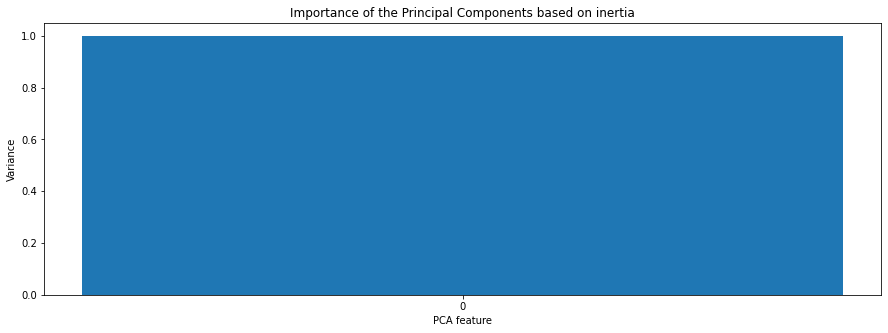

In [8]:
# Plot the principal components against their inertia
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [9]:
# Calculate PCA with 1 components
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x.values.reshape(-1,1))
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1'])

In [10]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1])

0.002218579641778257


**Spam analysis**

In [11]:
sensor = 's14'
df = pd.merge(left=principalDf, right=X[sensor], left_on=principalDf.index, right_on=X[sensor].index)
df.describe()

,key_0,pc1,s14
count,14400.00,14400.00,14400.00
mean,7199.50,-0.00,20.46
std,4157.07,2.67,2.67
min,0.00,-10.44,0.47
25%,3599.75,-1.69,18.53
50%,7199.50,-0.29,20.75
75%,10799.25,1.93,22.15
max,14399.00,19.99,30.90


In [12]:
def escoragem(pred, real):
    # computing errors
    errors = np.abs(pred - real).flatten()
    # estimation
    mean = sum(errors)/len(errors)
    cov = 0
    for e in errors:
        cov += (e - mean)**2
    cov /= len(errors)

    print('mean : ', mean)
    print('cov : ', cov)
    return errors, cov, mean

# calculate Mahalanobis distance
def Mahala_distantce(x,mean,cov):
    return (x - mean)**2 / cov

errors, cov, mean = escoragem(df['pc1'].values, df[sensor].values)

mahala_dist = []
for e in errors:
    mahala_dist.append(Mahala_distantce(e, mean, cov))

mean :  20.475590947144884
cov :  27.924420218379336


In [13]:
def scale(A):
    return (A-np.min(A))/(np.max(A) - np.min(A))


In [14]:
df['sensor_scores'] = mahala_dist
df['scaled_sensor'] = scale(mahala_dist)

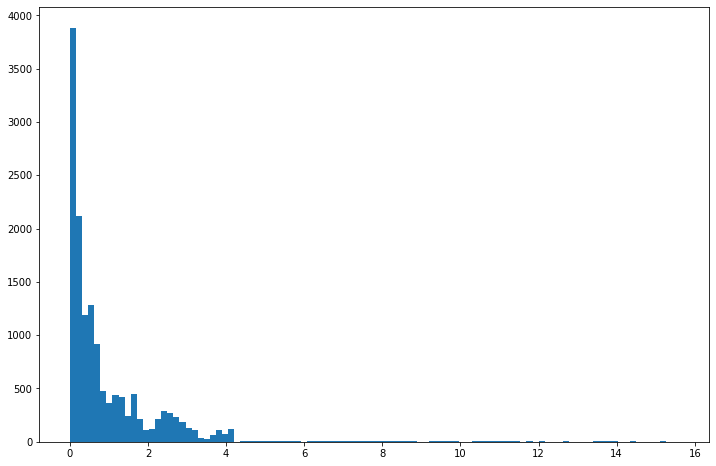

In [15]:
plt.figure(figsize=(12, 8))
plt.hist(df['sensor_scores'], bins=100);


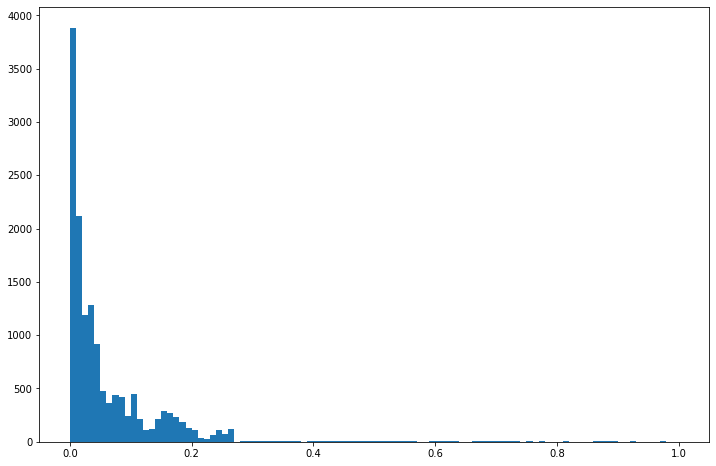

In [16]:
plt.figure(figsize=(12, 8))
plt.hist(df['scaled_sensor'], bins=100);

In [17]:
q1_pc1, q3_pc1 = df['sensor_scores'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1

# Calculate upper and lower bounds for outlier for pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
    # Filter out the outliers from the pc1
df['Spam_sensor'] = ((df['sensor_scores']>upper_pc1) | (df['sensor_scores']<lower_pc1)).astype('int')

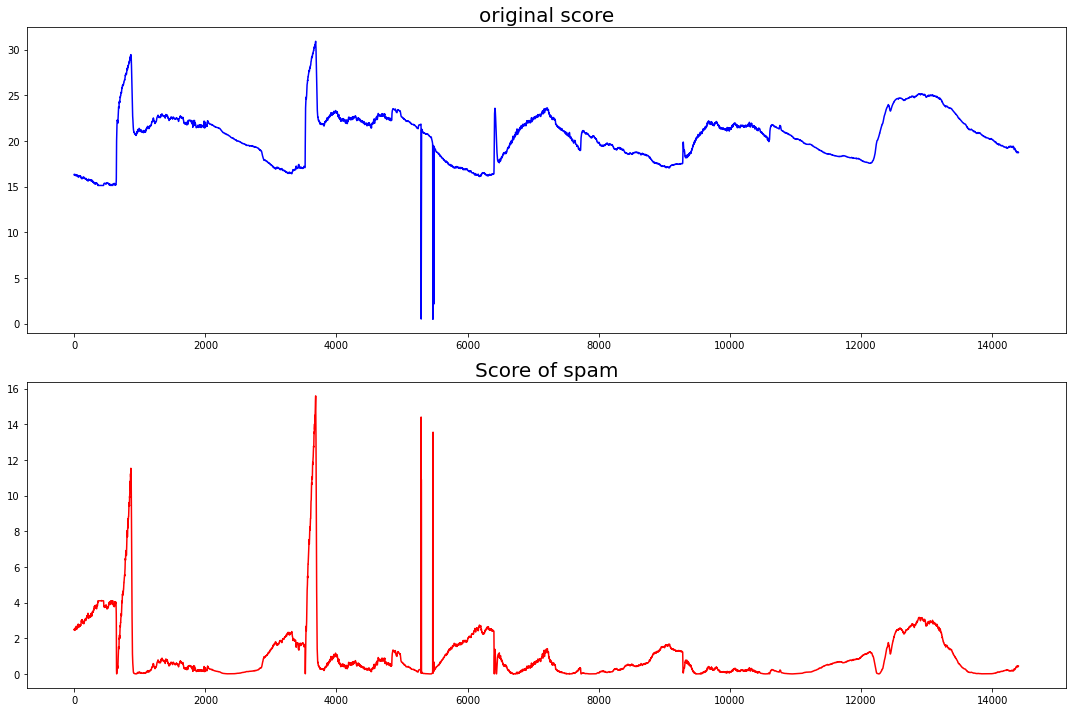

In [18]:
fig, axes = plt.subplots(nrows=2, figsize=(15,10))
axes[0].plot(df[sensor], color='blue')
axes[1].plot(np.array(mahala_dist).ravel(), color='red')

axes[0].set_title('original score', fontsize=20)
axes[1].set_title('Score of spam', fontsize=20)

# axes[0].grid()
# axes[1].grid()
plt.tight_layout()
plt.show()


In [19]:
df.head()

,key_0,pc1,s14,sensor_scores,scaled_sensor,Spam_sensor
0,0,4.15,16.31,2.48,0.16,0
1,1,4.15,16.31,2.48,0.16,0
2,2,4.15,16.31,2.48,0.16,0
3,3,4.17,16.29,2.50,0.16,0
4,4,4.19,16.27,2.53,0.16,0


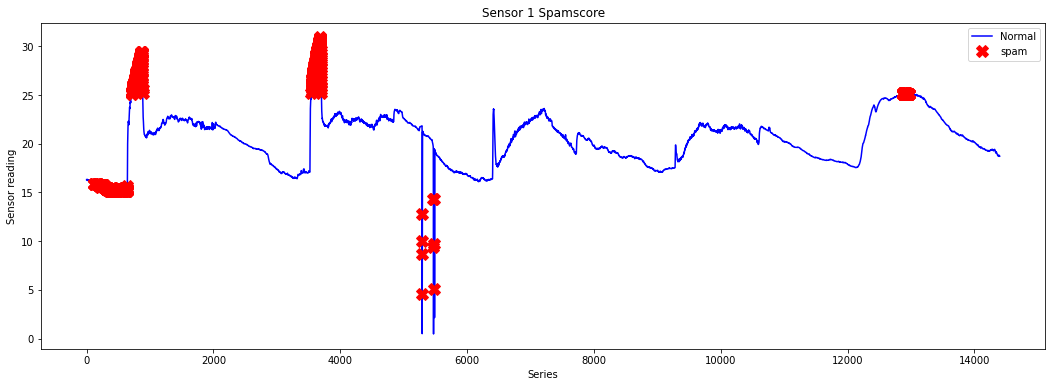

In [20]:
# visualization
a = X.loc[df['Spam_sensor'] == 1] 
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df[sensor], color='blue', label='Normal')
_ = plt.plot(a[sensor], linestyle='none', marker='X', color='red', markersize=12, label='spam')
_ = plt.xlabel('Series')
_ = plt.ylabel('Sensor reading')
_ = plt.title('Sensor 1 Spamscore')
_ = plt.legend(loc='best')
plt.show();


**Spam sensors**

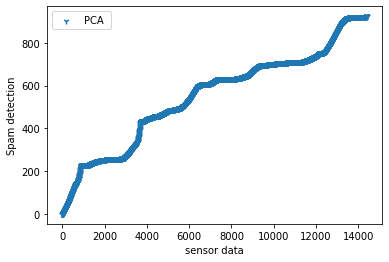

In [21]:
N = X.shape[0]
plt.scatter(range(N),df['scaled_sensor'][:N].cumsum(),marker='1',label='PCA ')
plt.xlabel('sensor data')
plt.ylabel('Spam detection')
plt.legend()
plt.show()

In [22]:
df.head()

,key_0,pc1,s14,sensor_scores,scaled_sensor,Spam_sensor
0,0,4.15,16.31,2.48,0.16,0
1,1,4.15,16.31,2.48,0.16,0
2,2,4.15,16.31,2.48,0.16,0
3,3,4.17,16.29,2.50,0.16,0
4,4,4.19,16.27,2.53,0.16,0


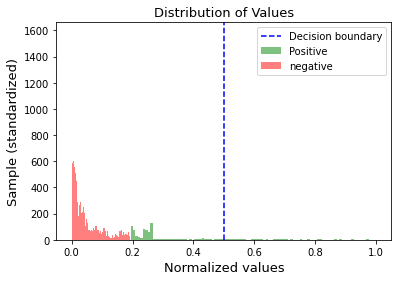

In [23]:
#2 -- Distributions of Predicted Probabilities of both classes
labels=['Positive','negative']
plt.hist(df[df['Spam_sensor']==1]['scaled_sensor'], density=False, bins=100,
             alpha=.5, color='green',  label=labels[0])
plt.hist(df[df['Spam_sensor']==0]['scaled_sensor'], density=False, bins=100,
             alpha=.5, color='red', label=labels[1])
plt.axvline(.5, color='blue', linestyle='--', label='Decision boundary')
# plt.xlim([0,1])
plt.title('Distribution of Values', size=13)
plt.xlabel('Normalized values', size=13)
plt.ylabel('Sample (standardized)', size=13)
plt.legend(loc="upper right")

**Calculating the IQR as anomaly score**

In [24]:
# Calculate IQR for the 1st principal component (pc1)
q1_pc1, q3_pc1 = df['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
# Calculate upper and lower bounds for outlier for pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
# Filter out the outliers from the pc1
df['anomaly_pc1'] = ((df['pc1']>upper_pc1) | (df['pc1']<lower_pc1)).astype('int')

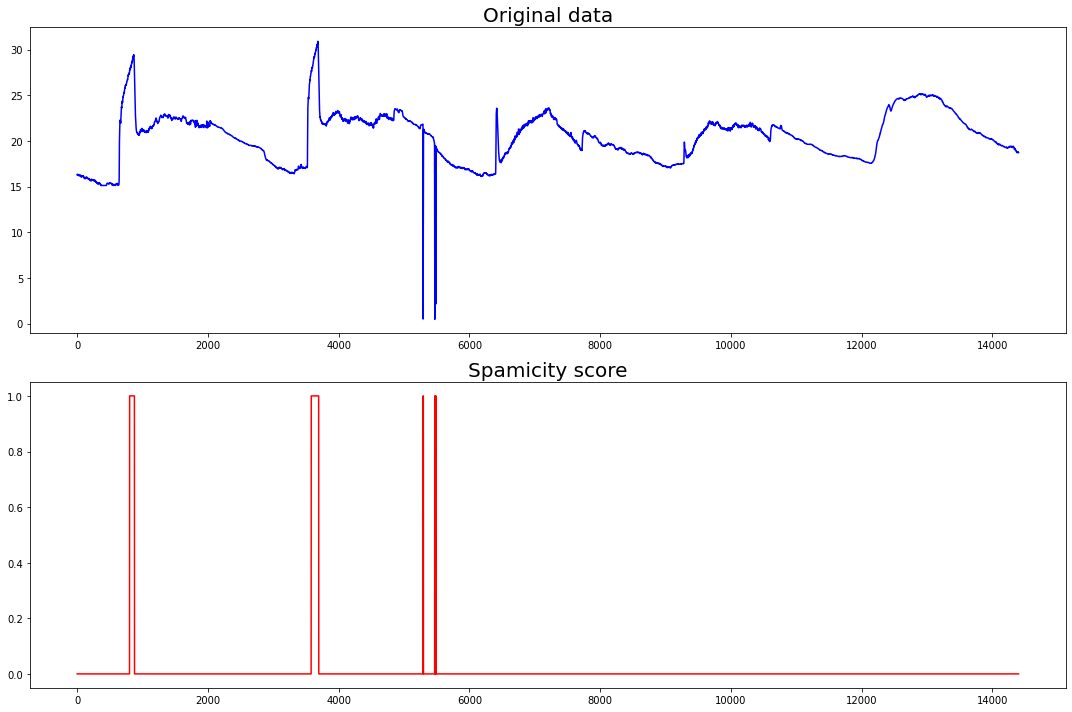

In [25]:
fig, axes = plt.subplots(nrows=2, figsize=(15,10))
axes[0].plot(df[sensor], color='blue')
axes[1].plot(df['anomaly_pc1'], color='red')

axes[0].set_title('Original data', fontsize=20)
axes[1].set_title('Spamicity score', fontsize=20)

# axes[0].grid()
# axes[1].grid()
plt.tight_layout()
plt.show()

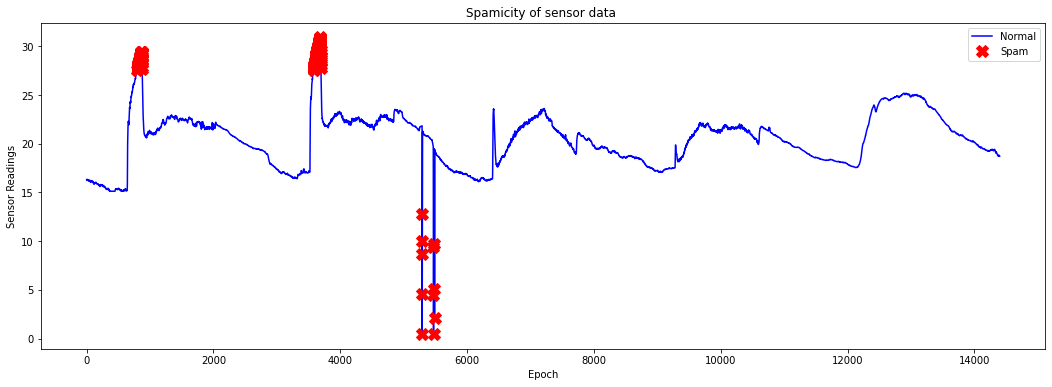

In [26]:
# Let's plot the outliers from pc1 on top of the sensor_11 and see where they occured in the time series
a = df[df['anomaly_pc1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(X[sensor], color='blue', label='Normal')
_ = plt.plot(a[sensor], linestyle='none', marker='X', color='red', markersize=12, label='Spam')
_ = plt.xlabel('Epoch')
_ = plt.ylabel('Sensor Readings')
_ = plt.title('Spamicity of sensor data ')
_ = plt.legend(loc='best')
plt.show();

**Spamicity of sensors**

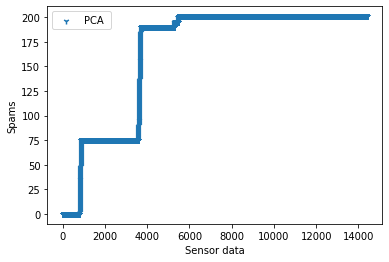

In [27]:
N = X.shape[0]
plt.scatter(range(N),df['anomaly_pc1'][:N].cumsum(),marker='1',label='PCA ')
plt.xlabel('Sensor data')
plt.ylabel('Spams')
plt.legend()
plt.show()

**Distribution of scores for Spam sensors**

In [28]:
df.head()

,key_0,pc1,s14,sensor_scores,scaled_sensor,Spam_sensor,anomaly_pc1
0,0,4.15,16.31,2.48,0.16,0,0
1,1,4.15,16.31,2.48,0.16,0,0
2,2,4.15,16.31,2.48,0.16,0,0
3,3,4.17,16.29,2.50,0.16,0,0
4,4,4.19,16.27,2.53,0.16,0,0


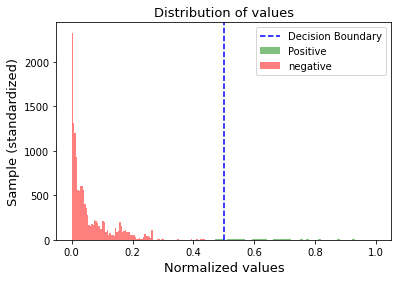

In [29]:
#2 -- Distributions of Predicted Probabilities of both classes
labels=['Positive','negative']
plt.hist(df[df['anomaly_pc1']==1]['scaled_sensor'], density=False, bins=100,
             alpha=.5, color='green',  label=labels[0])
plt.hist(df[df['anomaly_pc1']==0]['scaled_sensor'], density=False, bins=100,
             alpha=.5, color='red', label=labels[1])
plt.axvline(.5, color='blue', linestyle='--', label='Decision Boundary')
# plt.xlim([0,1])
plt.title('Distribution of values', size=13)
plt.xlabel('Normalized values', size=13)
plt.ylabel('Sample (standardized)', size=13)
plt.legend(loc="upper right")

In [30]:
df.head()

,key_0,pc1,s14,sensor_scores,scaled_sensor,Spam_sensor,anomaly_pc1
0,0,4.15,16.31,2.48,0.16,0,0
1,1,4.15,16.31,2.48,0.16,0,0
2,2,4.15,16.31,2.48,0.16,0,0
3,3,4.17,16.29,2.50,0.16,0,0
4,4,4.19,16.27,2.53,0.16,0,0


Calcualting the spamicity score

In [31]:
Spamicity_score=len(df[df['anomaly_pc1']==1])/len(df)
Non_spamicity=1-Spamicity_score
print(Spamicity_score)

0.013958333333333333


In [32]:
df.anomaly_pc1.value_counts()

0    14199
1      201
Name: anomaly_pc1, dtype: int64

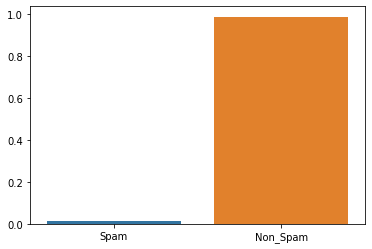

In [33]:
results=pd.DataFrame(data={'Spam':[Spamicity_score],'Non_Spam':[Non_spamicity]})
import seaborn as sns
sns.barplot(data=results)
plt.show()